
CSC6621 Spring 2023
Dr. Berisha
Mini Lab #3
Amini, Arsalon

In [3]:
import gzip
import struct
import numpy as np
import matplotlib.pyplot as plt
import requests
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [4]:
# Download a list of files
def download_files(url_list):
    file_paths = []
    for url in url_list:
        path = url.split('/')[-1]
        r = requests.get(url, stream=True)
        with open(path, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            print('Downloading {} - {:.1f} MB'.format(path, (total_length / 1024000)))
            for chunk in tqdm(r.iter_content(chunk_size=1024), total=int(total_length / 1024) + 1, unit="KB"):
                if chunk:
                    f.write(chunk)
        file_paths.append(path)
    print('All dataset files downloaded!')
    return file_paths


In [5]:
# Load and plot data from the .npz format
def load_and_plot_data(file_paths):
    # Load data
    data = np.load(file_paths[0])
    images = data['arr_0']
    labels = np.load(file_paths[1])['arr_0']

    # Plot examples from 4 different classes
    classes_to_plot = 4
    examples_per_class = 3
    fig, axes = plt.subplots(nrows=classes_to_plot, ncols=examples_per_class, figsize=(10, 10))
    for i in range(classes_to_plot):
        class_images = images[labels == i]
        for j in range(examples_per_class):
            axes[i, j].imshow(class_images[j], cmap='gray')
            axes[i, j].axis('off')
    plt.show()

    return images, labels

In [6]:
# Reshape and normalize images
def preprocess_images(images):
    images = images.reshape(-1, 28, 28, 1).astype('float32') / 255
    return images

In [7]:
selected_urls = [
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-imgs.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-train-labels.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-imgs.npz',
        'http://codh.rois.ac.jp/kmnist/dataset/kmnist/kmnist-test-labels.npz'
    ]

# Download files
file_paths = download_files(selected_urls)


100%|██████████| 17954/17954 [00:08<00:00, 2182.39KB/s]


100%|██████████| 30/30 [00:00<00:00, 799.32KB/s]


100%|██████████| 3008/3008 [00:01<00:00, 1786.66KB/s]


100%|██████████| 6/6 [00:00<00:00, 17236.87KB/s]

All dataset files downloaded!


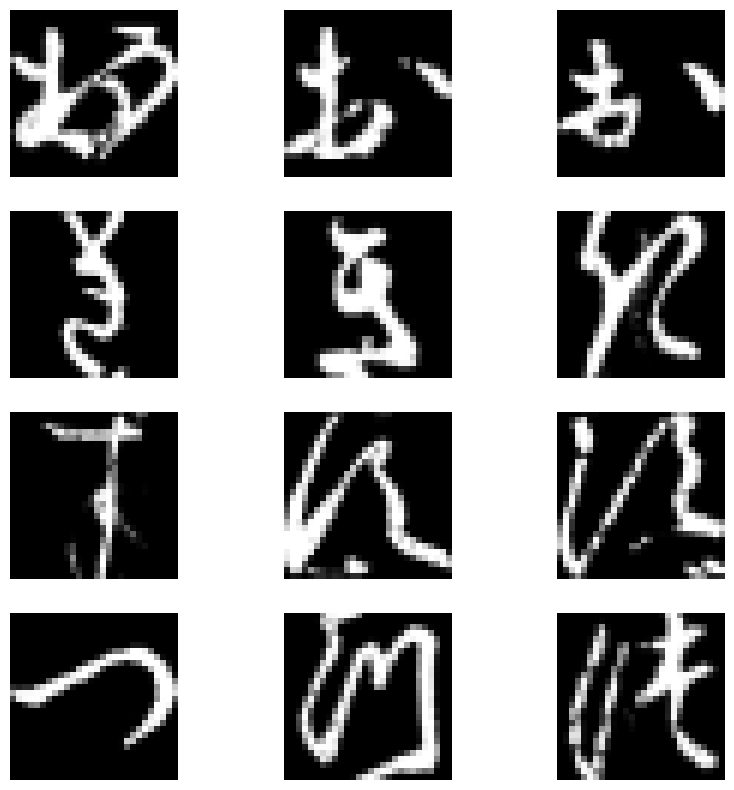

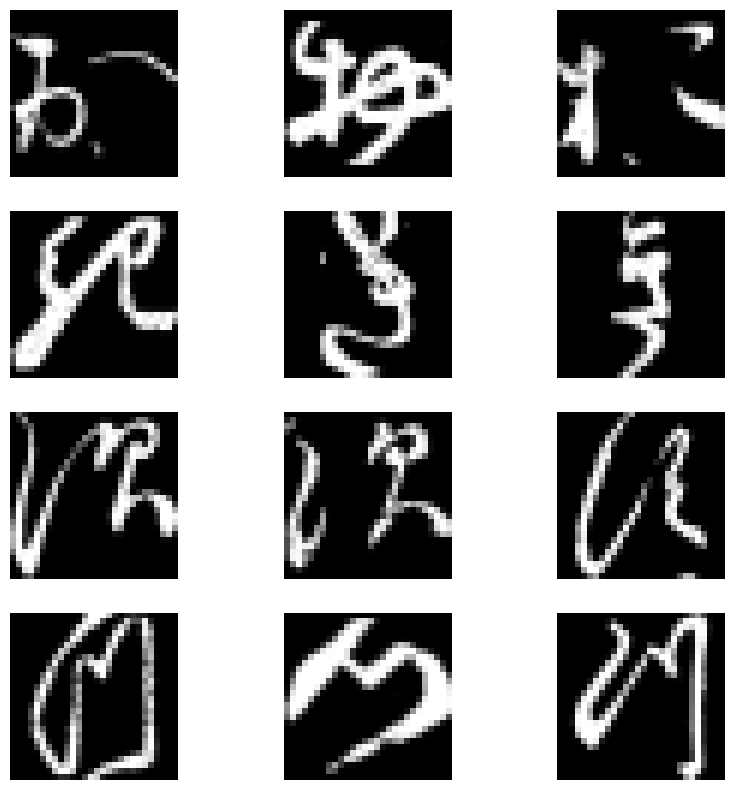

In [8]:
# Load, plot and preprocess the training data
train_images, train_labels = load_and_plot_data(file_paths[:2])
train_images = preprocess_images(train_images)

# Load and preprocess the test data
test_images, test_labels = load_and_plot_data(file_paths[2:])
test_images = preprocess_images(test_images)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,442 (25.16 KB)

 Trainable params: 6,442 (25.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 805us/step - accuracy: 0.5732 - loss: 1.3174 - val_accuracy: 0.6551 - val_loss: 1.1169
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - accuracy: 0.7972 - loss: 0.6732 - val_accuracy: 0.6827 - val_loss: 1.0283
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.8171 - loss: 0.6167 - val_accuracy: 0.6879 - val_loss: 1.0496
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.8274 - loss: 0.5788 - val_accuracy: 0.6835 - val_loss: 1.0168
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.8306 - loss: 0.5618 - val_accuracy: 0.6909 - val_loss: 1.0238
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - accuracy: 0.8343 - loss: 0.5561 - val_accuracy: 0.6906 - val_loss: 1.0119
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 776us/step - accuracy: 0.8379 - loss: 0.5397 - val_accuracy: 0.6999 - val_loss: 0.9759
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 682us/step - accuracy: 0.8384 -

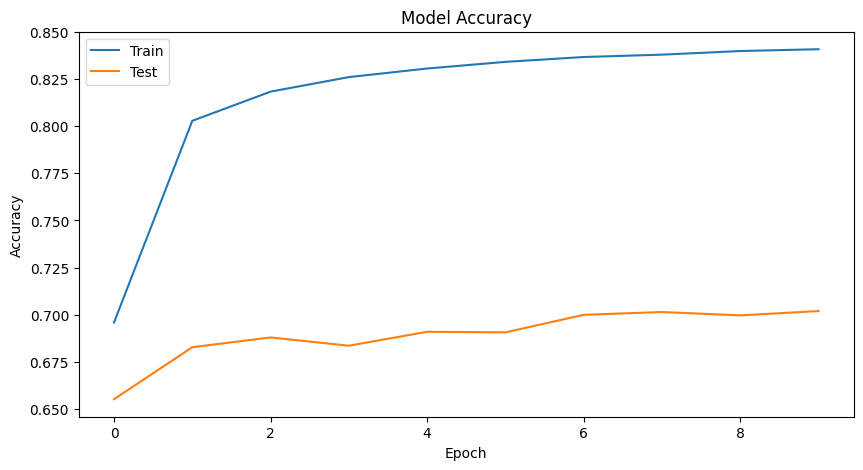

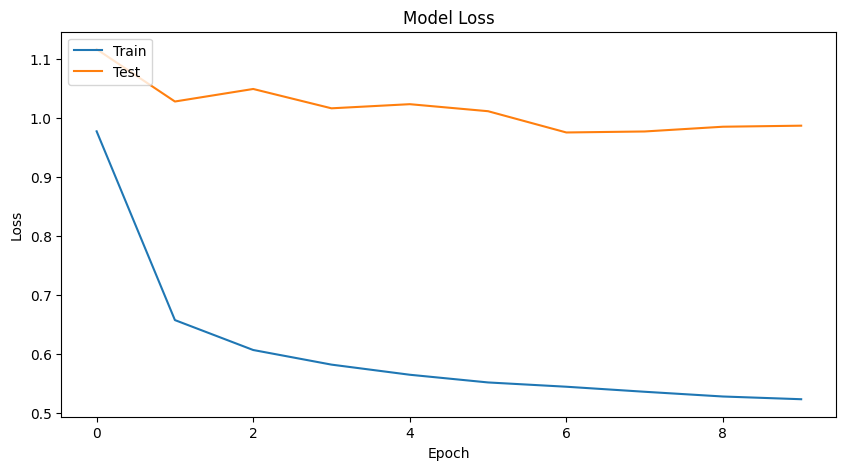

In [9]:
# Implement a Multi Layer Perception as a Baseline
dnn_model_one = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
dnn_model_one.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
dnn_model_one.summary()

# Train the model
history = dnn_model_one.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step


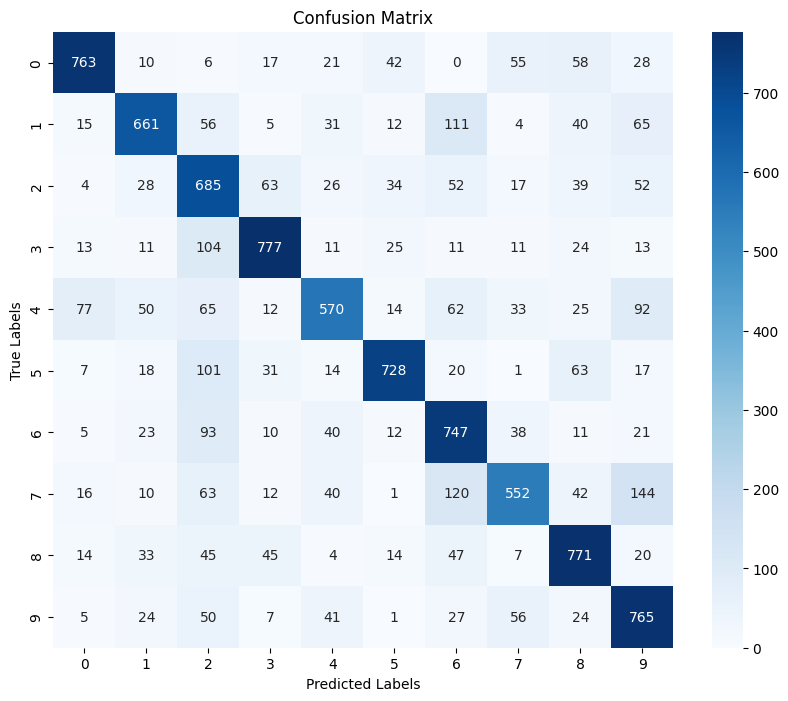

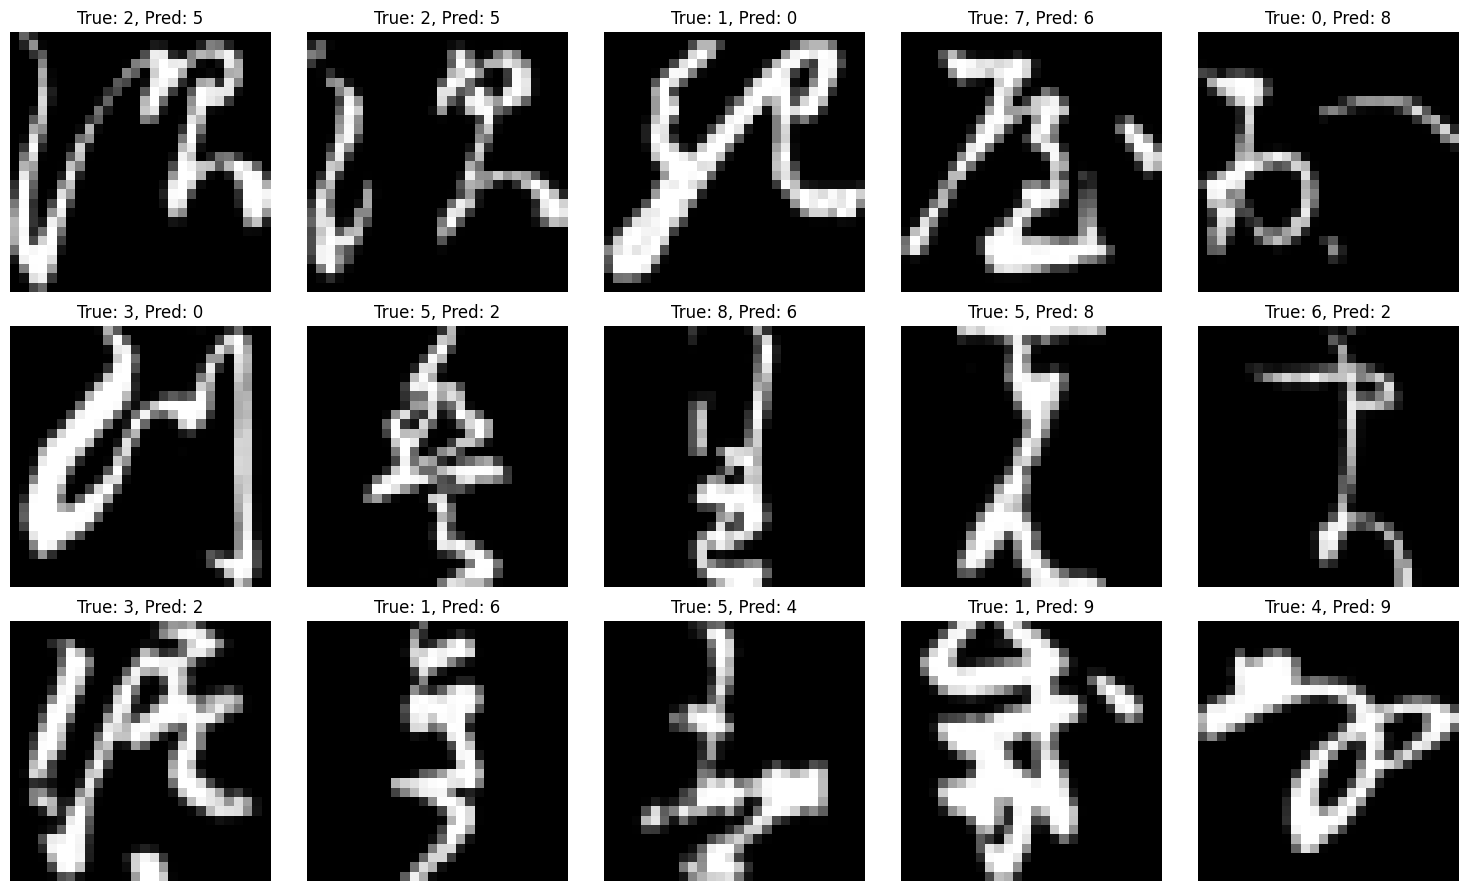

In [10]:
# Visualizing the confusion matrix and model errors


y_pred = dnn_model_one.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_labels  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Identify misclassified examples
misclassified_idxs = np.where(y_pred_classes != y_true)[0]
fig, ax = plt.subplots(3, 5, figsize=(15, 9))
for i, mis_idx in enumerate(misclassified_idxs[:15]):
    ax[i//5, i%5].imshow(test_images[mis_idx].reshape(28, 28), cmap='gray')
    ax[i//5, i%5].set_title(f'True: {y_true[mis_idx]}, Pred: {y_pred_classes[mis_idx]}')
    ax[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,442 (25.16 KB)

 Trainable params: 6,442 (25.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 740us/step - accuracy: 0.4982 - loss: 1.4686 - val_accuracy: 0.5811 - val_loss: 1.2806
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 585us/step - accuracy: 0.7696 - loss: 0.7318 - val_accuracy: 0.6695 - val_loss: 1.1004
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.8148 - loss: 0.6160 - val_accuracy: 0.6826 - val_loss: 1.0417
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.8246 - loss: 0.5765 - val_accuracy: 0.6829 - val_loss: 1.0557
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.8328 - loss: 0.5491 - val_accuracy: 0.6948 - val_loss: 1.0017
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 644us/step - accuracy: 0.8391 - loss: 0.5271 - val_accuracy: 0.7055 - val_loss: 0.9709
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8444 - loss: 0.5129 - val_accuracy: 0.6994 - val_loss: 0.9952
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 717us/step - accuracy: 0.8452 -

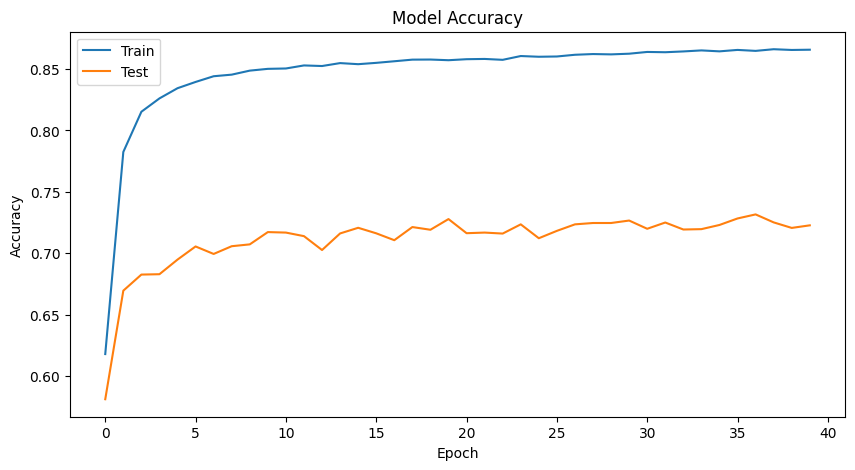

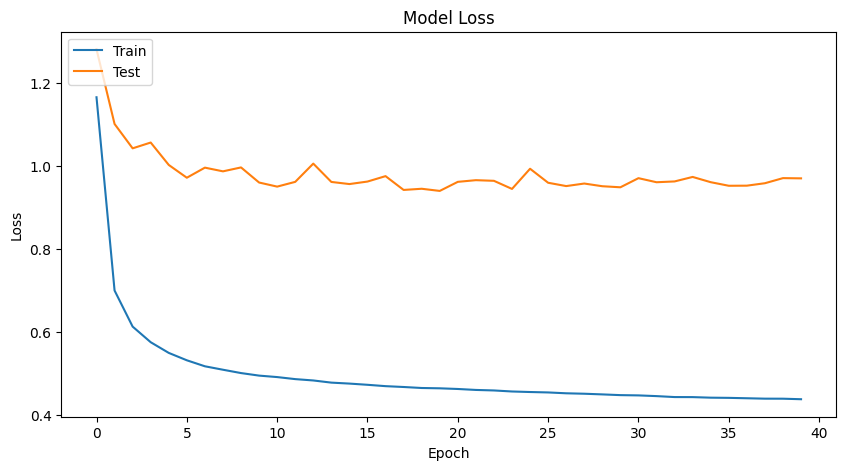

In [29]:
# Tuning - adding 50 epochs 

dnn_model_two = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
dnn_model_two.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
dnn_model_two.summary()

# Train the model
history = dnn_model_two.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [2]:
# Tuning - adding 24 more neurons per layer

dnn_model_three = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
dnn_model_three.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
dnn_model_three.summary()

# Train the model
history = dnn_model_three.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

NameError: name 'keras' is not defined

In [ ]:
# Assuming you have test_images and test_labels as your validation dataset
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_labels  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Identify misclassified examples
misclassified_idxs = np.where(y_pred_classes != y_true)[0]
fig, ax = plt.subplots(3, 5, figsize=(15, 9))
for i, mis_idx in enumerate(misclassified_idxs[:15]):
    ax[i//5, i%5].imshow(test_images[mis_idx].reshape(28, 28), cmap='gray')
    ax[i//5, i%5].set_title(f'True: {y_true[mis_idx]}, Pred: {y_pred_classes[mis_idx]}')
    ax[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,618 (111.79 KB)

 Trainable params: 28,618 (111.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7184 - loss: 0.8867 - val_accuracy: 0.7722 - val_loss: 0.7380
Epoch 2/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8987 - loss: 0.3313 - val_accuracy: 0.7871 - val_loss: 0.7239
Epoch 3/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9196 - loss: 0.2629 - val_accuracy: 0.8260 - val_loss: 0.5951
Epoch 4/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9343 - loss: 0.2179 - val_accuracy: 0.8261 - val_loss: 0.6029
Epoch 5/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9406 - loss: 0.1940 - val_accuracy: 0.8401 - val_loss: 0.5531
Epoch 6/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.9461 - loss: 0.1738 - val_accuracy: 0.8236 - val_loss: 0.6344
Epoch 7/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.9499 - loss: 0.1649 - val_accuracy: 0.8438 - val_loss: 0.5783
Epoch 8/80
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9518 - loss: 0.1

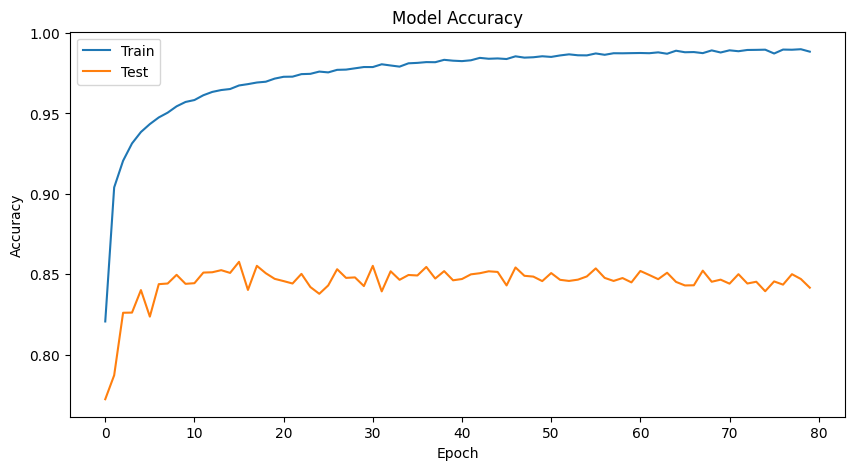

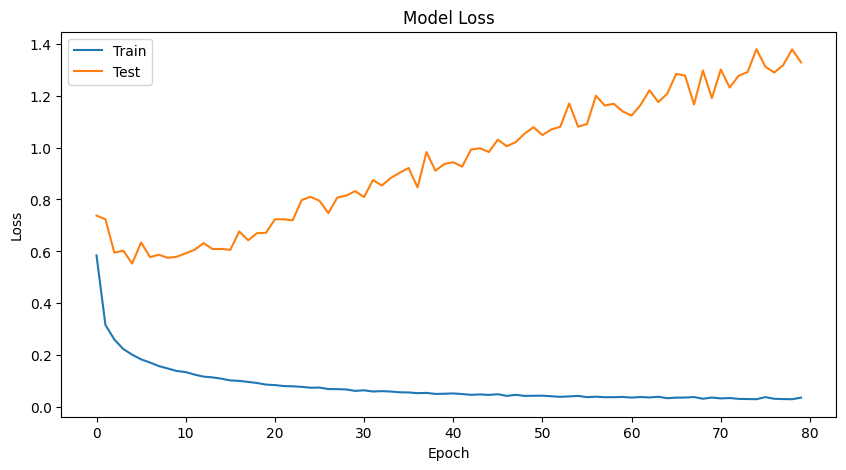

In [33]:
# Tuning - adding 24 more neurons per layer + 2 more layers + 50 epochs

dnn_model_four = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
dnn_model_four.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
dnn_model_four.summary()

# Train the model
history = dnn_model_four.fit(train_images, train_labels, epochs=80, validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 8)              │        73,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,714 (362.16 KB)

 Trainable params: 92,714 (362.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.6690 - loss: 0.9709 - val_accuracy: 0.7638 - val_loss: 0.8309
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9213 - loss: 0.2645 - val_accuracy: 0.8419 - val_loss: 0.5538
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9414 - loss: 0.1806 - val_accuracy: 0.8566 - val_loss: 0.5026
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9603 - loss: 0.1288 - val_accuracy: 0.8729 - val_loss: 0.4612
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9732 - loss: 0.0920 - val_accuracy: 0.8890 - val_loss: 0.4250
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9789 - loss: 0.0723 - val_accuracy: 0.8979 - val_loss: 0.4463
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9839 - loss: 0.0565 - val_accuracy: 0.8975 - val_loss: 0.4906
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9874 -

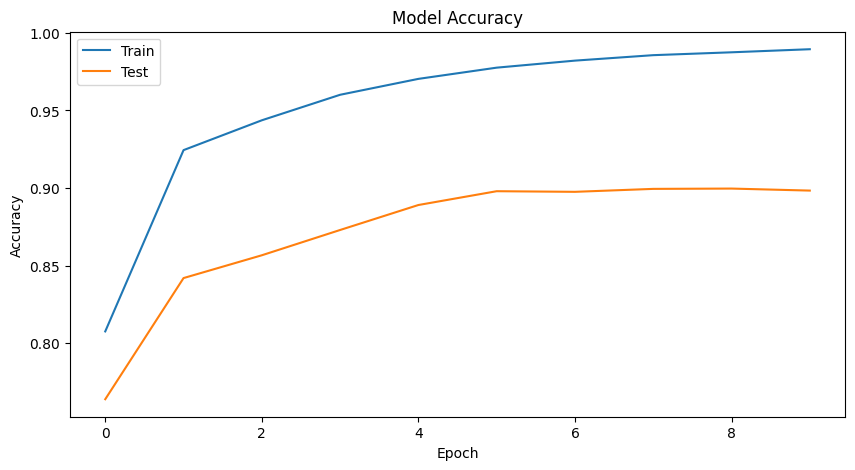

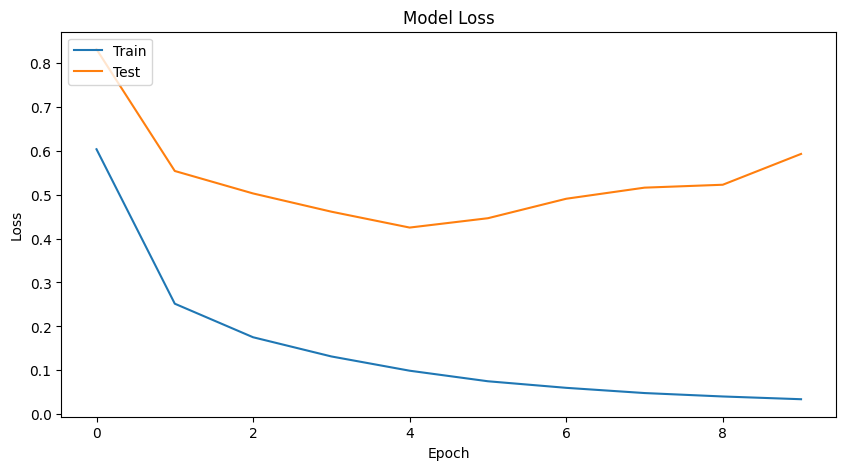

In [36]:
# Implement a small CNN 
model = models.Sequential()

# First convolutional layer with ReLU activation
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer with ReLU activation
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Max pooling layer with a 2x2 pool size
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 2D outputs to 1D
model.add(layers.Flatten())

# First dense layer with ReLU activation and optimized nodes (e.g., from previous MLP model)
model.add(layers.Dense(8, activation='relu'))
# Second dense layer with ReLU activation and optimized nodes
model.add(layers.Dense(8, activation='relu'))

# Output dense layer with 10 nodes for each class with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Output the summary of the model architecture
model.summary()

# Train the model 
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 8)              │       294,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,898 (1.20 MB)

 Trainable params: 313,898 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.6636 - loss: 1.0142 - val_accuracy: 0.7845 - val_loss: 0.7784
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9206 - loss: 0.2909 - val_accuracy: 0.8543 - val_loss: 0.5162
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9539 - loss: 0.1610 - val_accuracy: 0.8756 - val_loss: 0.4481
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9722 - loss: 0.0953 - val_accuracy: 0.8897 - val_loss: 0.4523
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9827 - loss: 0.0594 - val_accuracy: 0.8982 - val_loss: 0.4449
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9878 - loss: 0.0423 - val_accuracy: 0.8945 - val_loss: 0.4839
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9913 - loss: 0.0316 - val_accuracy: 0.9000 - val_loss: 0.5156
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9931 -

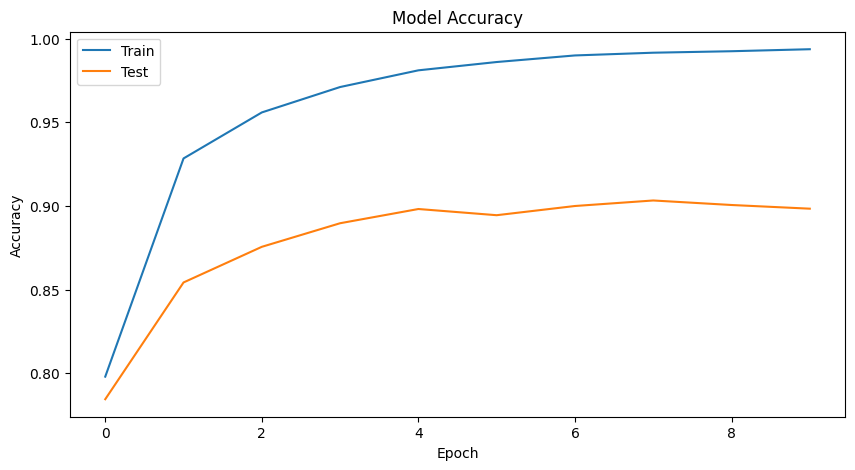

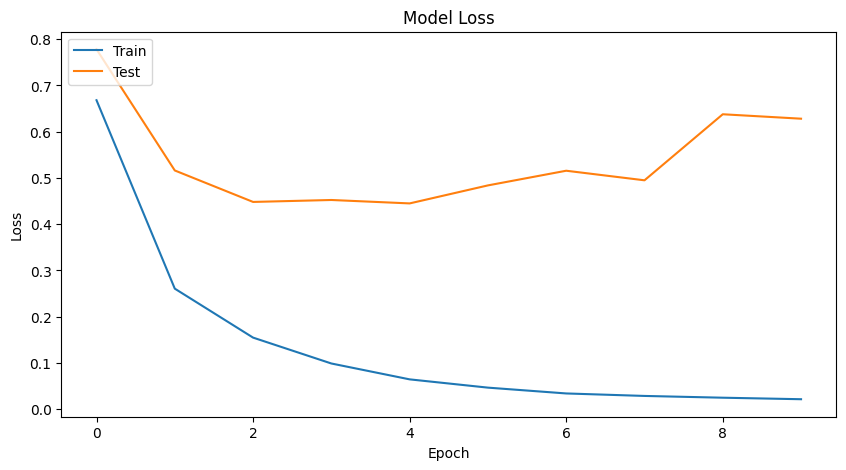

In [37]:
# CNN 2 - No max pooling layer 

model = models.Sequential()

# Input layer: the input shape must be specified in the first layer

# First convolutional layer with ReLU activation
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer with ReLU activation
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# Flatten layer to convert the 2D outputs to 1D
model.add(layers.Flatten())

# First dense layer with ReLU activation and optimized nodes (e.g., from previous MLP model)
model.add(layers.Dense(8, activation='relu'))

# Second dense layer with ReLU activation and optimized nodes
model.add(layers.Dense(8, activation='relu'))

# Output dense layer with 10 nodes for each class with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Output the summary of the model architecture
model.summary()

# Train the model 
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


/Users/arsalonamini/Desktop/csc6621_minilab_3/minilab3_venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │       123,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 216,746 (846.66 KB)

 Trainable params: 216,746 (846.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.6529 - loss: 1.0769 - val_accuracy: 0.8059 - val_loss: 0.7069
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9229 - loss: 0.2668 - val_accuracy: 0.8812 - val_loss: 0.4584
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.9617 - loss: 0.1331 - val_accuracy: 0.8976 - val_loss: 0.3735
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9751 - loss: 0.0840 - val_accuracy: 0.9063 - val_loss: 0.3893
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 112s 60ms/step - accuracy: 0.9816 - loss: 0.0613 - val_accuracy: 0.9139 - val_loss: 0.4118
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 47ms/step - accuracy: 0.9875 - loss: 0.0421 - val_accuracy: 0.9194 - val_loss: 0.3896
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9104 - val_loss: 0.4499
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9908 

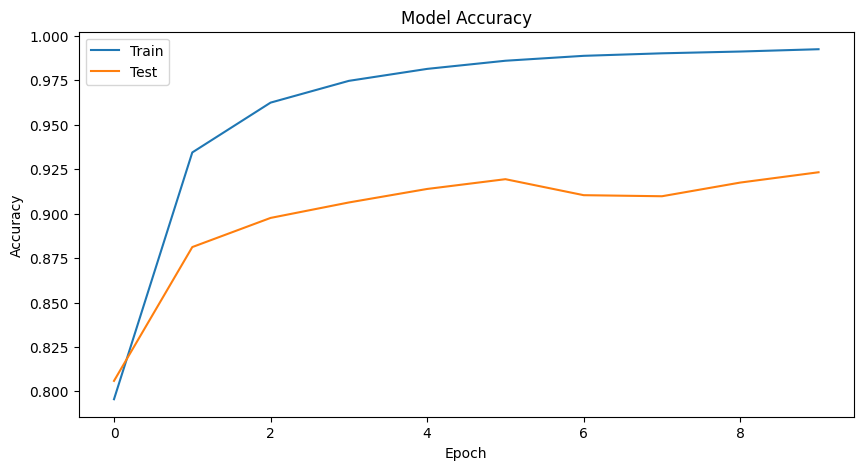

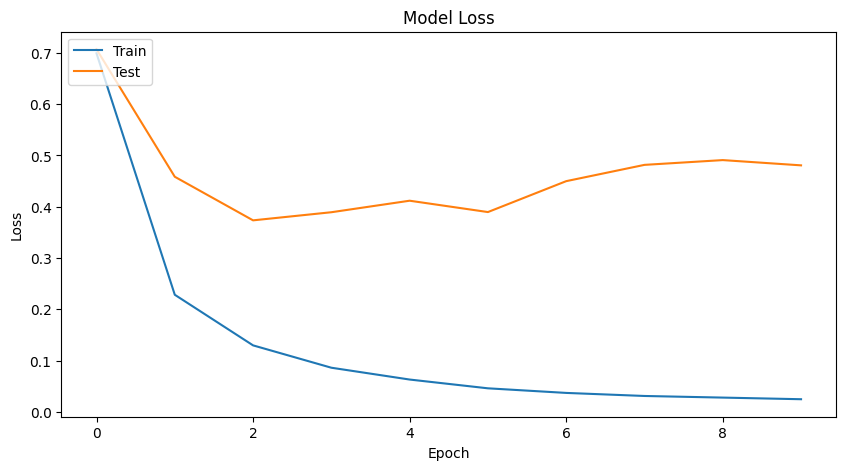

In [11]:
# Implement a small CNN 
model = models.Sequential()

# First convolutional layer with ReLU activation
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Second convolutional layer with ReLU activation
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# third convolutional layer with ReLU activation
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

# Max pooling layer with a 2x2 pool size
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer to convert the 2D outputs to 1D
model.add(layers.Flatten())

# First dense layer with ReLU activation and optimized nodes (e.g., from previous MLP model)
model.add(layers.Dense(8, activation='relu'))

# Second dense layer with ReLU activation and optimized nodes
model.add(layers.Dense(8, activation='relu'))

# Output dense layer with 10 nodes for each class with softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Output the summary of the model architecture
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


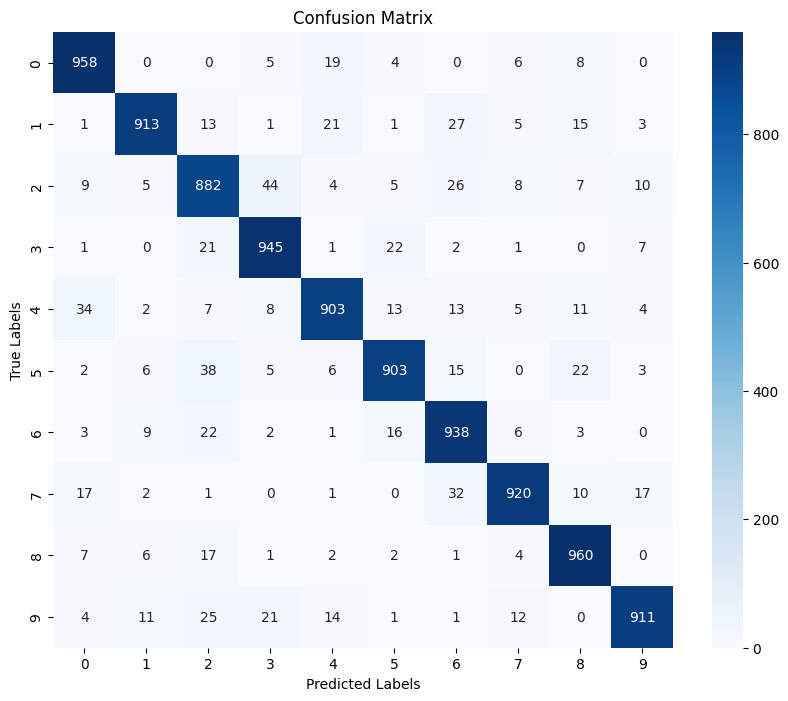

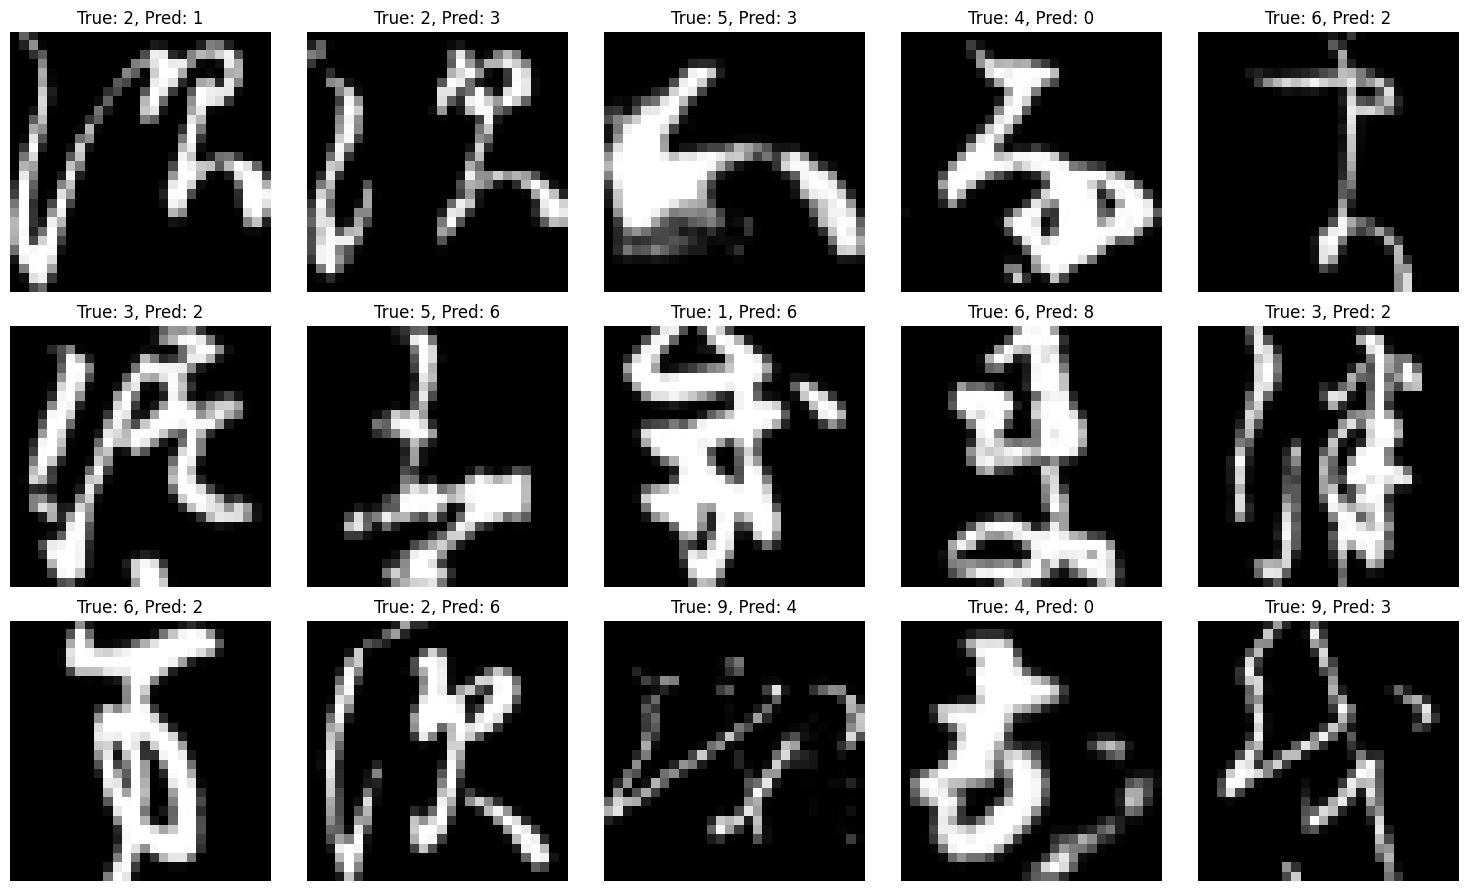

In [12]:
# Visualizing the model's mistakes 

y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_labels  # True class labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Identify misclassified examples
misclassified_idxs = np.where(y_pred_classes != y_true)[0]
fig, ax = plt.subplots(3, 5, figsize=(15, 9))
for i, mis_idx in enumerate(misclassified_idxs[:15]):
    ax[i//5, i%5].imshow(test_images[mis_idx].reshape(28, 28), cmap='gray')
    ax[i//5, i%5].set_title(f'True: {y_true[mis_idx]}, Pred: {y_pred_classes[mis_idx]}')
    ax[i//5, i%5].axis('off')
plt.tight_layout()
plt.show()
